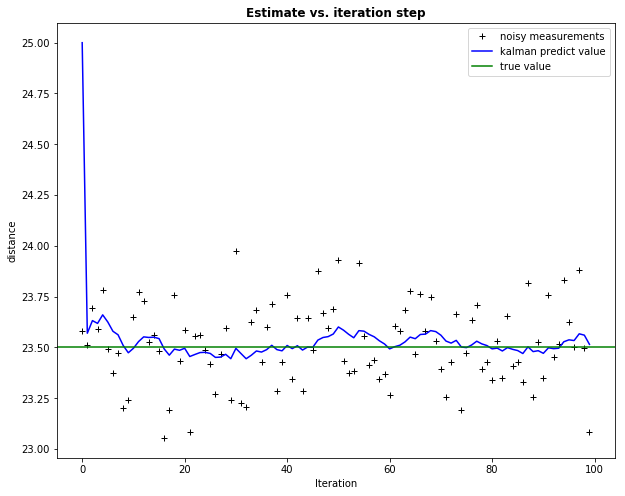

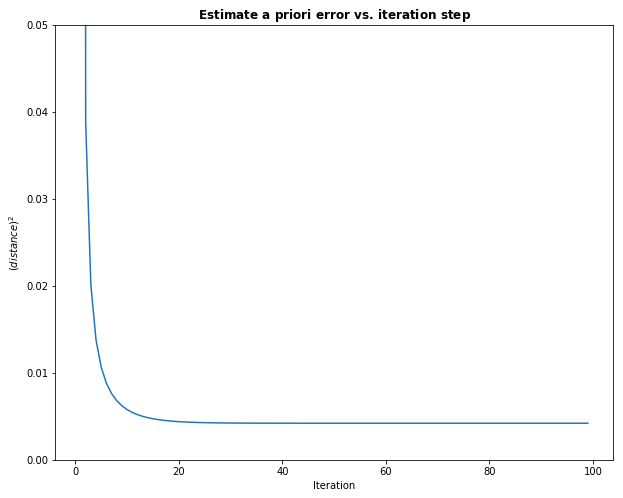

In [19]:

import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (10,8)

#inital parameters

n_iter = 100
sz = (n_iter,)
x = 23.5    #真实距离
z = np.random.normal(x,0.2,size=sz)  #测量值


#allocate apace for arrays
state_kalman = np.zeros(sz)     # a posteri estimate of x 估计值
state_pre = np.zeros(sz)     # a priori estimate of x     预测值
P = np.zeros(sz)             # a posteri error estimate  
Pminus = np.zeros(sz)        # a priori error estimate   系统误差
K = np.zeros(sz)             # gain or blending factor



R = 0.2**2                   #测量时的方差

Q = 0.0004                    #预测时的方差

state_kalman[0] = 25    # 距离初始值
P[0] =1           # 距离初始估计方差


for k in range(1,n_iter):
    #time update
    state_pre[k] = state_kalman[k-1]    #根据上一个卡尔曼估计值，直接预测，就是原来的值保持不变
    Pminus[k] = P[k-1] + Q              # 存在预测误差


    K[k] = Pminus[k]/(Pminus[k] + R)  # kalman 增益   
    state_kalman[k] = state_pre[k] + K[k]*(z[k] - state_pre[k])   #估计值（权重不一样）
    P[k] = (1-K[k])*Pminus[k]


plt.figure()
plt.plot(z,'k+',label = 'noisy measurements')
plt.plot(state_kalman,'b-',label = 'kalman predict value')
plt.axhline(x,color = 'g',label = 'true value')

plt.legend()
plt.title('Estimate vs. iteration step',fontweight = 'bold')
plt.xlabel('Iteration')
plt.ylabel('distance')



plt.figure()
valid_iter = range(1,n_iter)
plt.plot(valid_iter,Pminus[valid_iter],label = 'a priori erroe estimate')

plt.title('Estimate $\it{\mathbf{a \ priori}}$ error vs. iteration step',fontweight = 'bold')

plt.xlabel('Iteration')
plt.ylabel('$(distance)^2$')

plt.setp(plt.gca(),'ylim',[0,.05])
plt.show()
